In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

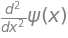

In [4]:
psi(x).diff(x, x)

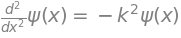

In [5]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [6]:
sp.dsolve(eq, psi(x), ics={psi(0): 0})

In [7]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

In [8]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [9]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [10]:
sol.rhs * x * sol.rhs

In [11]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

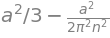

In [12]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

$$\sigma_X^2=<x^2>-<x>^2

$$<p>-?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$
$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Sprawdzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.


### Rozwiązanie: 
#### Średnia "x" :


In [13]:
X_sr=sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
X_sr

### Średnia "x" podniesiona do kwadratu:



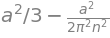

In [14]:
X_sr_kw=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
X_sr_kw

#### Odchylenie standardowe położenia:

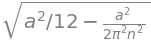

In [15]:
sigma_X_kw=X_sr_kw-X_sr**2
sigma_X=sp.sqrt(sigma_X_kw)
sigma_X

#### Potencjał:


In [16]:
P=sp.integrate(sol.rhs * (-h*sp.I*sp.diff(sol.rhs,x)),(x,0,a))
P

#### Potencjał podniesiony do kwadratu:

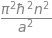

In [17]:
P_kw=sp.integrate(sol.rhs * ((h*sp.I)**2)*sp.diff(sol.rhs,x,2),(x,0,a)).simplify()
P_kw

#### Odchylenie standardowe potencjału:

In [18]:
sigma_P_kw=P_kw-P**2
sigma_P=sp.sqrt(sigma_P_kw).simplify()
sigma_P

#### Sprawdzenie nierówności:
$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

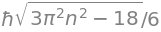

In [19]:
rown=sigma_X*sigma_P
rown.simplify()

Weryfikacja czy warunek jest spełniony dla najmniejszego możliwego "n"(czyli "1"):

In [21]:
rozw=h*sp.sqrt(3*sp.pi**2-18)/6
wyn=h/2
if(rozw.evalf()>=wyn):
    print("Zasada nieoznaczoności została spełniona")

rozw.evalf(),wyn

Zasada nieoznaczoności została spełniona


Wynik "0,56786" jest większy od "0,5". Po sprawdzeniu warunku dla najmniejszej wartości zasada nieoznaczoności jest spełniona.